# Python Introduction

## Arithmetics

In [1]:
x = 5
x

5

In [3]:
print(f"x={x}")
print("Addition: x+2=", x + 2)
print("Subtraction: x-2=", x - 2)
print("Multiplication: x*2=", x * 2)
print("Division: x/2=", x / 2)
print("Floor division: x//2=", x // 2)
print("Modulus: x%2=", x % 2)
print("Exponentiation: x^2=", x ** 2)

x=5
Addition: x+2= 7
Subtraction: x-2= 3
Multiplication: x*2= 10
Division: x/2= 2.5
Floor division: x//2= 2
Modulus: x%2= 1
Exponentiation: x^2= 25


In [ ]:
print(x > 5)  # Python Logical Operators: <, <=, >, >=, ==, !=, and, or, not

False


## Data Structures

In [4]:
list_ = [12, 4, 5, 8, 9]  # list
tuple_ = (12, 4, 6, 8, 9)  # tuple
dictionary_ = {'first': 12, 'second': 5, 'third': -66}  # dictionary or map
set_ = {3, 0, 1, 0, 3, 2, -3}  # set
set_

{-3, 0, 1, 2, 3}

## List Comprehension

In [ ]:
[i for i in range(5)]
# range(stop)  ->  generates a list with elements in [0,stop)
# range(start, stop, step=1) -> generates a list with elements in [start,stop) and step size of `step`

[0, 1, 2, 3, 4]

In [5]:
# same as above
a = []
for i in range(5):
    a.append(i)
a

[0, 1, 2, 3, 4]

In [6]:
[i for i in range(3, 10, 3)]

[3, 6, 9]

# Machine Learning basic definitions

**Machine Learning (ML):** Set of methods that allow computers to learn from data to make and improve predictions

**ML Algorithm:** A method (or program) which learns the ML Model.

**ML Model:** is the learned program that maps inputs to predictions. This can be a set of weights for a linear model or for a neural network. In formulas, the trained machine learning model is called $\hat{f}$ or $\hat{f}(x)$.

**Black Box Model:** is a system that does not reveal its internal mechanisms. In machine learning, “black box” describes models that cannot be understood by looking at their parameters (e.g. a neural network).

**Interpretable (or White Box) Model:** refers to methods and models that make the behavior and predictions of machine learning systems understandable to humans.

# Dataset

A dataset is consist of datapoints. A datapoint can be described by its feature vector ($x$) and label ($y$).
- A **datapoint** (or instance) can be seen as a row of a table
- A **feature vector** describes the known information about a datapoint (e.g. in case of a house: $m^2$, number of rooms, location, has garden...), denoted as $x^{(i)}$
- A **feature** can be seen as the column of a table (e.g. $m^2$)
- A **label** (or target) is the objective we wish to predict with our model $y_{i}$ (e.g. cost of the house)

Usually we split our dataset into 3 parts:
- **Train set**: we use it to train a model
- **Validation (or development) set**: we use it to calibrate the model
- **Test set**: we use it to test the model. Every aspect of it has to stay unknown until the final testing period.

**IMPORTANT: DO NOT MIX THE SPLITS** 

# Before we dive deeper

First we have to discuss something more important than our model: our data. In order to learn a model, we have to understand what kind of objective we wish to model, and what "kind of data" we have. It can help us to decide the feasibility of the task and select a suitable model. 

So our first step is to understand the dataset: the features, relationship between features, relationship between data points, quility of the data, scarcity of data points...

The interpretability of the features is a big assumption. But if it is hard to understand the input features, it is even harder to understand what the model does.

A pipeline looks something like this:
1. We have to understand our data (understanding features and visualizing it)
2. Select an algorithm (e.g. linear regression)
3. Learn the model (train the model on a __train set__)
4. Improve the model (on a __validation set__)
    1. Tune the model (e.g. change hyperparameters)
    2. Analyze the model (e.g. interpret the weights)
5. Test the model (test the accuracy of the model on a __test set__)

Due to time constraints we may ommit some steps.

## Risk Factors for Cervical Cancer

The cervical cancer dataset contains indicators and risk factors for predicting whether a woman will get cervical cancer which is available at [UCI](https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29).

Let's try to load and inspect the dataset.

In [146]:
# Useful python packages
import numpy as np  # numeric calculations

import pandas as pd  # data manipulation and storage

# Popular visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
# First, we are going to load our dataset with the hrlp of pandas
# it is going to return a special DataFrame object which holds our data
cancer_dataset = pd.read_csv("https://raw.githubusercontent.com/ficstamas/FateML/1d501349b56c8c65e601b6ce40c56cca2a8050a5/notebooks/data/risk_factors_cervical_cancer.csv")
cancer_dataset  # we can easily display it as well

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


## So what kind of features do we have?

In [148]:
# we can obtain the list of features by returning the columns of the DataFrame
cancer_dataset.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

Let's interpret them:
- Age: in years (integer)
- Number of sexual partners (integer)
- First sexual intercourse: in years (integer)
- Num of pregnancies: amount (integer)
- Smokes: yes or no (boolean)
- Smokes (years): Number of years with cigaret (float)
- Smokes (packs/year): number of packs per year (float)
- Hormonal Contraceptives: whether the person takes contraceptives (boolean)
- Hormonal Contraceptives (years): Number of years with an Hormonal Contraceptives (float)
- IUD: using intrauterine device (boolean)
- IUD (years): Number of years with an intrauterine device (float)
- STDs: Has patient ever had a sexually transmitted disease (boolean)
- STDs (number): Number of STD diagnoses (integer)
- STDs:* : different kind of STD viruses (boolean)
- STDs: Number of diagnosis: (integer)
- STDs: Time since first diagnosis: Time since first STD diagnosis (integer)
- STDs: Time since last diagnosis: Time since last STD diagnosis (integer)
- Hinselmann, Schiller, Citology, Biopsy: different kind of tests (boolean)

We have 4 potentioal target variables: Hinselmann, Schiller, Citology, Biopsy. We're going to follow the literature and use **Biopsy as our target** variable. Furthermore, we're going to **reduce the number of features in our feature vector**. Thus we are not going to be overwhelmed by them. However, don't do it blindly when you are working on an unknown dataset!

In [149]:
# lets compose the list of features
features_numeric = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 
                    'Smokes (years)',  'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 
                    'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
features_boolean = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs']
target = 'Biopsy'
# You can concatonate lists by adding them together
features = features_numeric + features_boolean + [target]

In [150]:
cancer_dataset = cancer_dataset[features]
cancer_dataset

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Smokes,Hormonal Contraceptives,IUD,STDs,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0,?,?,0.0,0.0,0.0,0.0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0,?,?,0.0,0.0,0.0,0.0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0,?,?,0.0,0.0,0.0,0.0,0
3,52,5.0,16.0,4.0,37.0,3.0,0.0,0.0,0,?,?,1.0,1.0,0.0,0.0,0
4,46,3.0,21.0,4.0,0.0,15.0,0.0,0.0,0,?,?,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0.0,0.0,0.0,0.0,0
854,32,2.0,19.0,1.0,0.0,8.0,0.0,0.0,0,?,?,0.0,1.0,0.0,0.0,0
855,25,2.0,17.0,0.0,0.0,0.08,0.0,0.0,0,?,?,0.0,1.0,0.0,0.0,0
856,33,2.0,24.0,2.0,0.0,0.08,0.0,0.0,0,?,?,0.0,1.0,0.0,0.0,0


You may have noticed the `?` in the dataset. These question marks represent the lack of feedback (missing values) due to privacy reasons. We have to handle them somehow. There are some possible solutions:
1. Drop datapoints with missing values
2. Drop features with missing values
3. Impute the missing information

The first soultion is good if it's only affect a small portion of the dataset. If we think the affected feature is useless we can go with the second solution. If none of the before mentioned methods are suitable, then we have to go with the third option.

We can estimate and impute data in several ways:
- mean, median, most frequent or constant values
- k-Nearest Neighbour (k-NN)
- Multivariate Imputation by Chained Equation (MICE)

However, we are going to use the most frequent strategy, although it is not neccessary the best solution. You can experiment with the other alternatives as well.

In [151]:
import warnings

def enforce_dtypes(df: pd.DataFrame, cols: list, dtype):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        df[cols] = df[cols].astype(dtype)

In [152]:
# we are going to change the string '?' to internal NaN values
# usually other packages rely on NaNs
for column in cancer_dataset.columns:
    cancer_dataset.loc[cancer_dataset[column] == '?', column] = np.nan
    # Let's change the boolean values to boolean from string
    if column in features_boolean + [target]:
        cancer_dataset.loc[cancer_dataset[column].astype('float').astype('bool'), column] = True
        cancer_dataset.loc[~cancer_dataset[column].astype('float').astype('bool'), column] = False
     
enforce_dtypes(cancer_dataset, features_numeric, float)
enforce_dtypes(cancer_dataset, features_boolean + [target], bool)

cancer_dataset

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Smokes,Hormonal Contraceptives,IUD,STDs,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.00,0.0,0.0,0.0,NaN,NaN,False,False,False,False,False
1,15.0,1.0,14.0,1.0,0.0,0.00,0.0,0.0,0.0,NaN,NaN,False,False,False,False,False
2,34.0,1.0,NaN,1.0,0.0,0.00,0.0,0.0,0.0,NaN,NaN,False,False,False,False,False
3,52.0,5.0,16.0,4.0,37.0,3.00,0.0,0.0,0.0,NaN,NaN,True,True,False,False,False
4,46.0,3.0,21.0,4.0,0.0,15.00,0.0,0.0,0.0,NaN,NaN,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0,0.0,0.0,0.00,0.0,0.0,0.0,NaN,NaN,False,False,False,False,False
854,32.0,2.0,19.0,1.0,0.0,8.00,0.0,0.0,0.0,NaN,NaN,False,True,False,False,False
855,25.0,2.0,17.0,0.0,0.0,0.08,0.0,0.0,0.0,NaN,NaN,False,True,False,False,False
856,33.0,2.0,24.0,2.0,0.0,0.08,0.0,0.0,0.0,NaN,NaN,False,True,False,False,False


Let's make a `train-dev-test` split first, because you **MUST NOT** infer missing values from your test set.

In [153]:
from sklearn.model_selection import train_test_split

# we are going to split it in a 0.7(train):0.1(dev):0.2(test) ratio
train, test = train_test_split(cancer_dataset, train_size=0.8, random_state=0)
train, dev = train_test_split(train, train_size=int(len(cancer_dataset)*0.7), random_state=0)
len(train), len(dev), len(test)

(600, 86, 172)

In [154]:
len(train)/len(cancer_dataset)

0.6993006993006993

In [155]:
train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Smokes,Hormonal Contraceptives,IUD,STDs,Biopsy
59,35.0,3.0,17.0,4.0,0.0,7.0,0.08,2.0,1.0,19.0,19.0,False,True,True,True,False
220,25.0,NaN,18.0,2.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,False,True,True,True,False
495,25.0,NaN,16.0,3.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,False,True,True,True,False
225,28.0,6.0,15.0,3.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,False,True,True,True,False
542,19.0,3.0,16.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,16.0,1.0,15.0,1.0,0.0,0.0,0.00,0.0,0.0,NaN,NaN,False,False,False,False,False
568,24.0,1.0,19.0,1.0,0.0,0.0,0.00,0.0,0.0,NaN,NaN,False,False,False,False,False
128,29.0,1.0,29.0,1.0,0.0,0.0,0.00,0.0,0.0,NaN,NaN,False,False,False,False,False
209,25.0,3.0,15.0,2.0,0.0,9.0,0.00,0.0,0.0,NaN,NaN,False,True,False,False,False


Now, we can impute our dataset easily with the help of `sklearn`. 

In [156]:
from sklearn.impute import SimpleImputer  # lets load the imputer object from sklearn

# 'strategy' paramter defines how we wish to replace missing values
# 'missing_values' a representation of the missing value (yes, we could just use the '?' symbol)
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

imp_mean = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

# fit_transform() calculates the most frequent value (fit) and applies it on our DataFrame (transform)
train_imputed = imp_mean.fit_transform(train)
dev_imputed = imp_mean.transform(dev)
test_imputed = imp_mean.transform(test)

# sadly, sklearn returns a numpy array and not a DataFrame, so we have to fix that
train = pd.DataFrame(data=train_imputed, columns=train.columns, index=train.index)
dev = pd.DataFrame(data=dev_imputed, columns=dev.columns, index=dev.index)
test = pd.DataFrame(data=test_imputed, columns=test.columns, index=test.index)

enforce_dtypes(train, features_boolean + [target], bool)
enforce_dtypes(dev, features_boolean + [target], bool)
enforce_dtypes(test, features_boolean + [target], bool)

train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Smokes,Hormonal Contraceptives,IUD,STDs,Biopsy
59,35.0,3.0,17.0,4.0,0.0,7.0,0.08,2.0,1.0,19.0,19.0,False,True,True,True,False
220,25.0,2.0,18.0,2.0,0.0,0.0,0.00,0.0,0.0,1.0,1.0,False,True,True,True,False
495,25.0,2.0,16.0,3.0,0.0,0.0,0.00,0.0,0.0,1.0,1.0,False,True,True,True,False
225,28.0,6.0,15.0,3.0,0.0,0.0,0.00,0.0,0.0,1.0,1.0,False,True,True,True,False
542,19.0,3.0,16.0,1.0,0.0,0.0,0.00,0.0,0.0,1.0,1.0,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,16.0,1.0,15.0,1.0,0.0,0.0,0.00,0.0,0.0,1.0,1.0,False,False,False,False,False
568,24.0,1.0,19.0,1.0,0.0,0.0,0.00,0.0,0.0,1.0,1.0,False,False,False,False,False
128,29.0,1.0,29.0,1.0,0.0,0.0,0.00,0.0,0.0,1.0,1.0,False,False,False,False,False
209,25.0,3.0,15.0,2.0,0.0,9.0,0.00,0.0,0.0,1.0,1.0,False,True,False,False,False


## Data Visualization

The "how" and "what" should we visualize is a complex topic on its own, and we are not going to go into too much detail. 

For data visualization, we are going to use [Seaborn](https://seaborn.pydata.org/index.html). It has several high-level functions which can ease our life. However, it is highly customizeable as well.

Some good to know figure level functions:
- [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) with variants (`kind` parameter): scatter and line
- [displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) with variants (`kind` parameter): hist (histogram), kde (kernel density) and ecdf (empirical cumulative distribution function)
- [catplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.catplot) with variants (`kind` parameter): 
  - Categorical scatterplots: strip and swarm
  - Categorical distribution plots: box, violin and boxen
  - Categorical estimate plots: point, bar and count
  
 Also there are several other plot level functions such as regression plot (regplot) or heatplot... Feel free to have a look at all of them: [function APIs](https://seaborn.pydata.org/api.html#function-interface), [plotting tutorials](https://seaborn.pydata.org/tutorial.html#plotting-functions), [gallery](https://seaborn.pydata.org/examples/index.html)

Average Age: 26.868333333333332


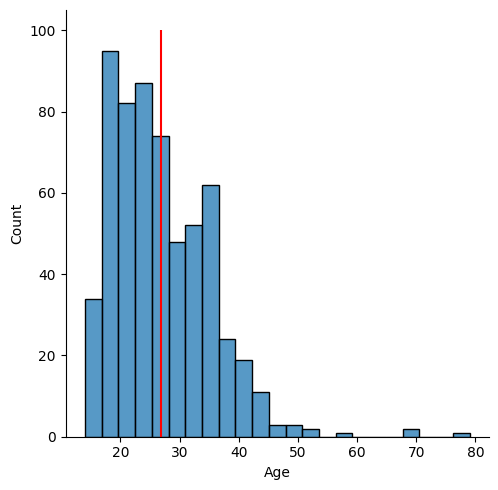

In [158]:
# let's have a look at the age distribution of paricipents
mean_age = train['Age'].mean()
sns.displot(data=train, kind="hist", x="Age")
plt.vlines(mean_age, 0, 100, "red") # this is going to draw a vertical red line at the average age
print(f"Average Age: {mean_age}")

We can conlude that the expected age of the paricipants is around ~27, and we do not have a statistically significant amount of datapoints about people approximatly above the age of 50. So we can treat them as outliers if we wish. 

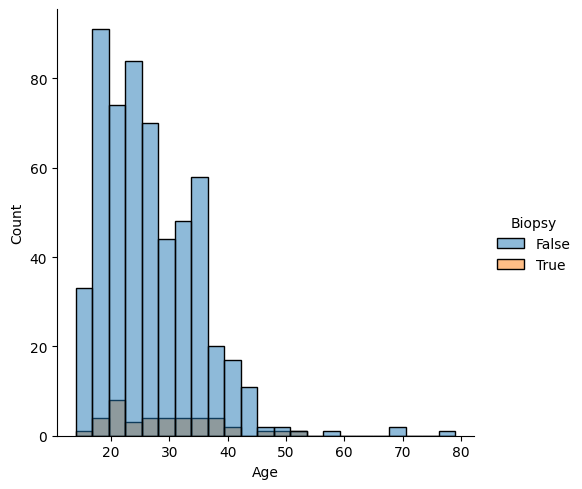

In [159]:
# We can also show the results of the Biopsy with a hue
sns.displot(data=train, kind="hist", x="Age", hue="Biopsy")

We can see that we have no datapoint with positive Biopsy over the age of 55, and have at least 1 positive datapoint for every other age category.

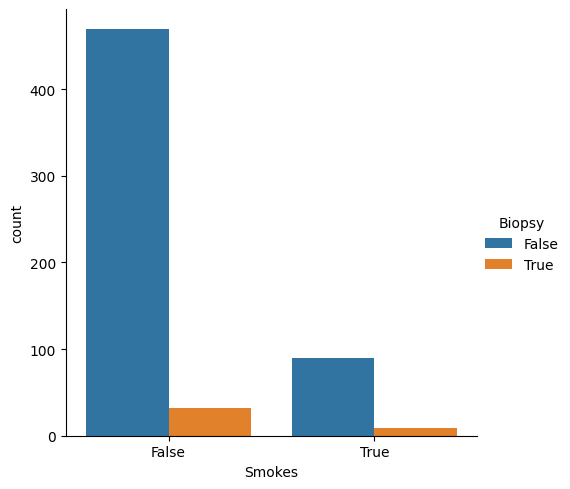

In [160]:
# Lets see how smoking habbits affect the Cervical Cancer
# Do you think smoking highly affects the chances?
sns.catplot(data=train, kind="count", x="Smokes", hue="Biopsy")

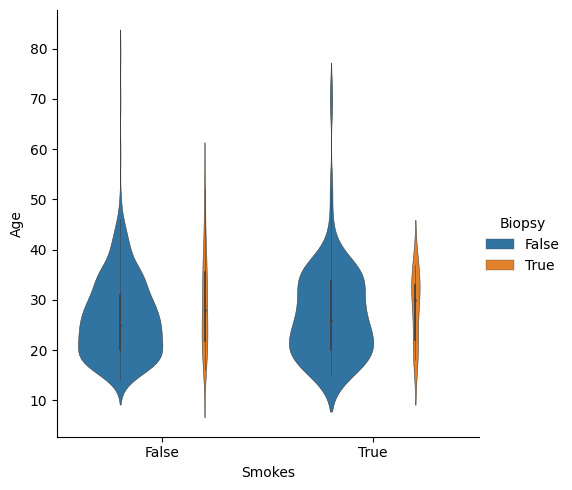

In [166]:
sns.catplot(data=train, kind="violin", scale="count", x="Smokes", y="Age", hue="Biopsy", linewidth=0.4)

# Practice

- Load the `bike_rental_daily.csv` file (make sure every column has the correct data type)
  - Link: [https://raw.githubusercontent.com/ficstamas/FateML/1d501349b56c8c65e601b6ce40c56cca2a8050a5/notebooks/data/bike_rental_daily.csv](https://raw.githubusercontent.com/ficstamas/FateML/1d501349b56c8c65e601b6ce40c56cca2a8050a5/notebooks/data/bike_rental_daily.csv)
- Interpret the features
- Try to visualize interesting aspects of it (don't be affraid to try other visualization types)

Dataset details:

- Count of bicycles including both casual and registered users. The count is used as the target in the regression task.
- The season, either spring, summer, fall or winter.
- Indicator whether the day was a holiday or not.
- The year, either 2011 or 2012.
- Number of days since the 01.01.2011 (the first day in the dataset). This feature was introduced to take account of the trend over time.
- Indicator whether the day was a working day or weekend.
- The weather situation on that day. One of:
  1. clear, few clouds, partly cloudy, cloudy
  2. mist + clouds, mist + broken clouds, mist + few clouds, mist
  3. light snow, light rain + thunderstorm + scattered clouds, light rain + scattered clouds
  4. heavy rain + ice pallets + thunderstorm + mist, snow + mist
- Temperature in degrees Celsius.
- Relative humidity in percent (0 to 100).
- Wind speed in km per hour.
